In [5]:
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/323.6 kB 991.0 kB/s eta 0:00:01
   ---- ---------------------------------- 41.0/323.6 kB 991.0 kB/s eta 0:00:01
   -------- ------------------------------ 71.7/323.6 kB 653.6 kB/s eta 0:00:01
   ------------- ------------------------ 112.6/323.6 kB 731.4 kB/s eta 0:00:01
   ------------------ ------------------- 153.6/323.6 kB 654.6 kB/s eta 0:00:01
   ---------------------- --------------- 194.6/323.6 kB 695.5 kB/s eta 0:00:01
   -------------------------- ----------- 225.3/323.6 kB 724.0 kB/s eta 0:00:01
   ------------------------------ ------- 256.0/323.6 kB 714.4 kB/s eta 0:00:01
   -------------------------------- ----- 276.5/323.6 kB 682.7 kB/s eta 0:00:01
   ------------------------------------ - 307.2/323.6 kB 703.7 kB/s eta 0:00:01
   -------------------------------------- 323.6/323.6 kB 691.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1

In [9]:
!pip install folium

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   -------------- ------------------------ 41.0/110.5 kB 326.8 kB/s eta 0:00:01
   ---------------------------- ---------- 81.9/110.5 kB 573.4 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.5 kB 492.8 kB/s eta 0:00:01
   -------------------------------------- 110.5/110.5 kB 493.9 kB/s eta 0:00:00


In [13]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 435.7 kB/s eta 0:00:31
   ---------------------------------------- 0.0/13.3 MB 435.7 kB/s eta 0:00:31
   ---------------------------------------- 0.0/13.3 MB 196.9 kB/s eta 0:01:08
   ---------------------------------------- 0.0/13.3 MB 196.9 kB/s eta 0:01:08
   ---------------------------------------- 0.1/13.3 MB 218.8 kB/s eta 0:01:01
   ---------------------------------------- 0.1/13.3 MB 218.6 kB/s eta 0:01:01
   ---------------------------------------- 0.1/13.3 MB 238.1 kB/s eta 0:00:56
   ---------------------------------------- 0.1/13.3 MB 238.1 kB/s eta 0:00:56
   ---------------------------------------- 0.1/13.3 MB 252.2 kB/s eta 0:00:53
   ---------------------------------------- 0.1/13.3 MB 240.2 kB/s eta 0:00:55
   ---------------------------------------- 0.1/13.3 MB 240.2 kB/s eta

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from prophet import Prophet

# Load dataset
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Superstore.csv", parse_dates=["Order Date"])

# Preprocess data
df["Year-Month"] = df["Order Date"].dt.to_period("M")

# Set style for plots
sns.set_style("whitegrid")

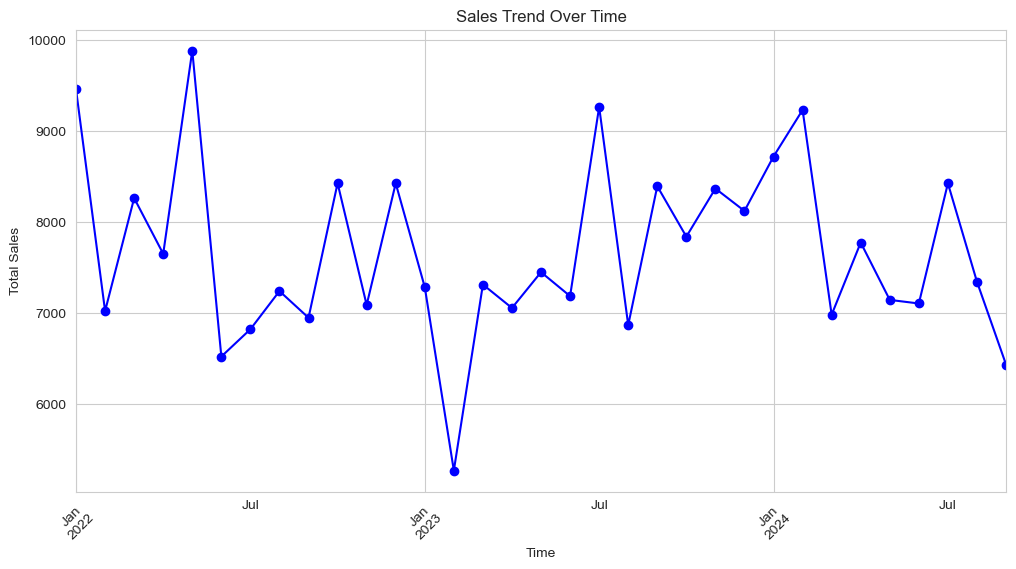

In [19]:
### 1. Sales Over Time (Line Chart)
plt.figure(figsize=(12,6))
df.groupby("Year-Month")["Sales"].sum().plot(kind="line", marker="o", color="b")
plt.title("Sales Trend Over Time")
plt.xlabel("Time")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


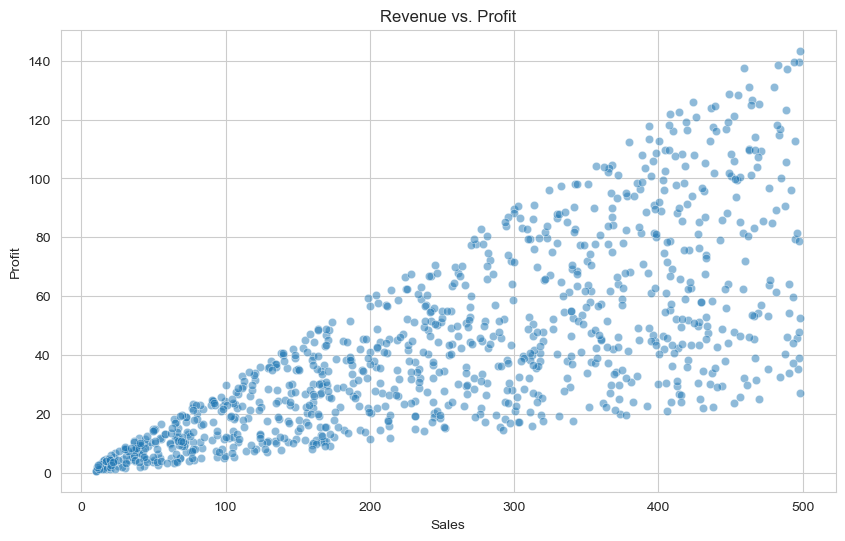

In [21]:
### 2. Revenue vs. Profit (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Sales"], y=df["Profit"], alpha=0.5)
plt.title("Revenue vs. Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()

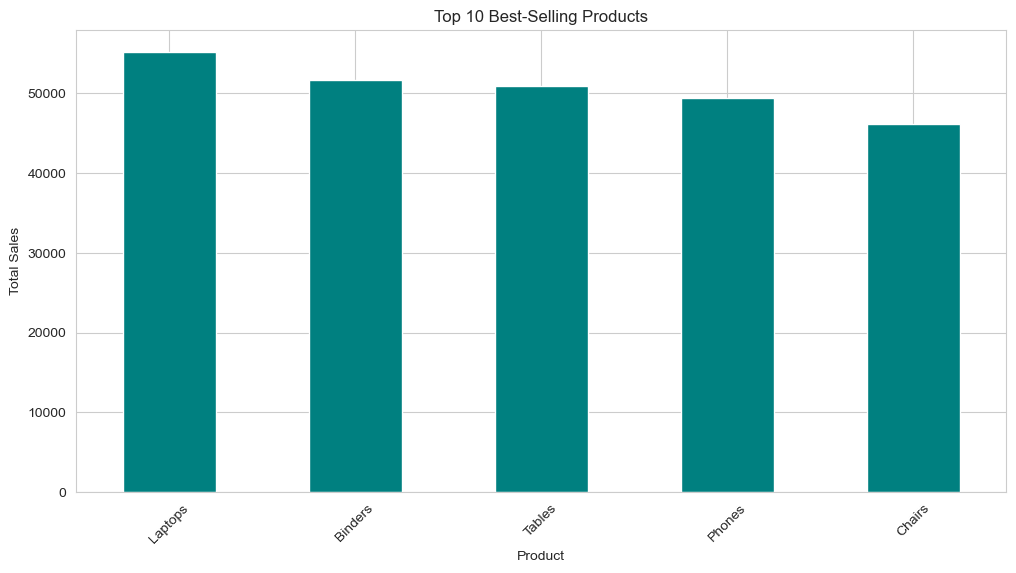

In [23]:
### 3. Top 10 Best-Selling Products (Bar Chart)
top_products = df.groupby("Sub-Category")["Sales"].sum().nlargest(10)
plt.figure(figsize=(12,6))
top_products.plot(kind="bar", color="teal")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

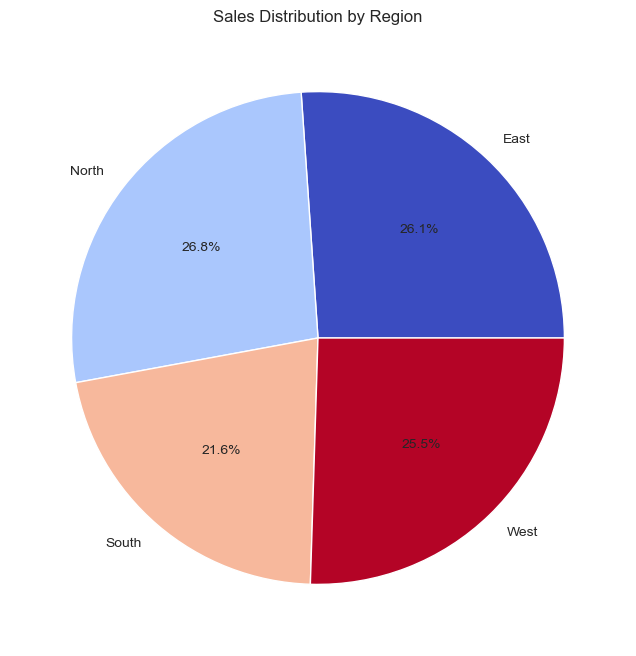

In [25]:
### 4. Sales Distribution by Region (Pie Chart)
plt.figure(figsize=(8,8))
df.groupby("Region")["Sales"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm")
plt.title("Sales Distribution by Region")
plt.ylabel("")  # Hide default ylabel
plt.show()

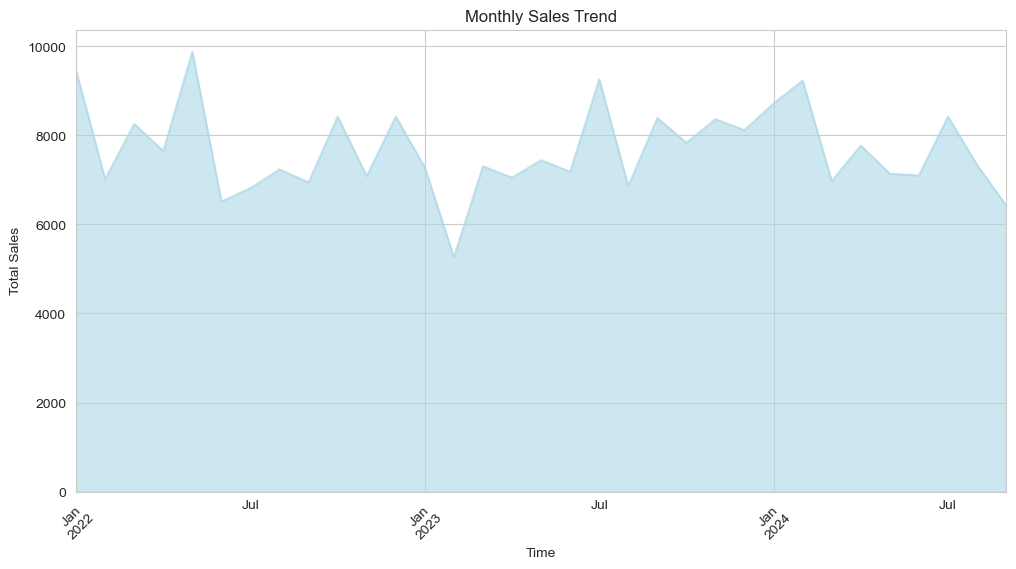

In [27]:
### 5. Monthly Sales Trend (Area Chart)
plt.figure(figsize=(12,6))
df.groupby("Year-Month")["Sales"].sum().plot(kind="area", color="lightblue", alpha=0.6)
plt.title("Monthly Sales Trend")
plt.xlabel("Time")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

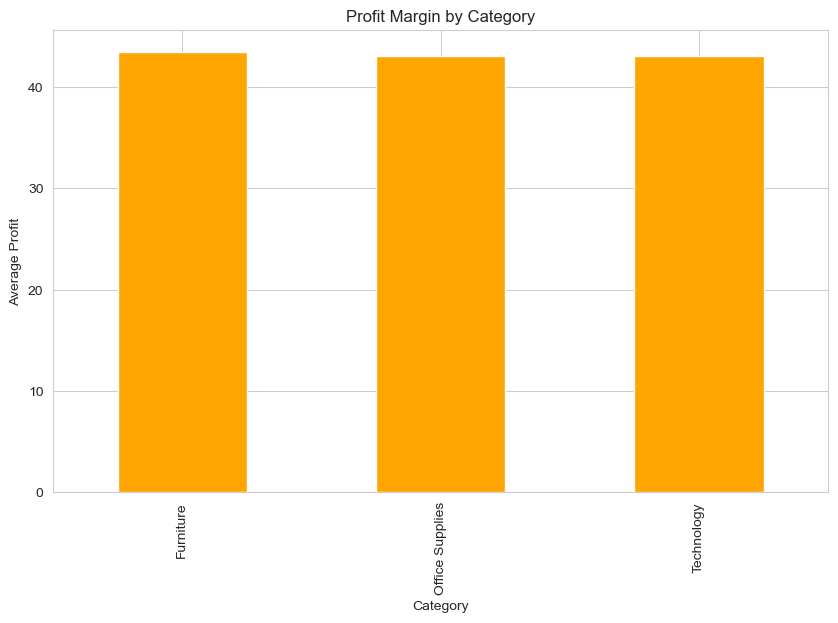

In [29]:
### 6. Profit Margin by Category (Bar Chart)
category_profit = df.groupby("Category")["Profit"].mean()
plt.figure(figsize=(10,6))
category_profit.plot(kind="bar", color="orange")
plt.title("Profit Margin by Category")
plt.xlabel("Category")
plt.ylabel("Average Profit")
plt.show()

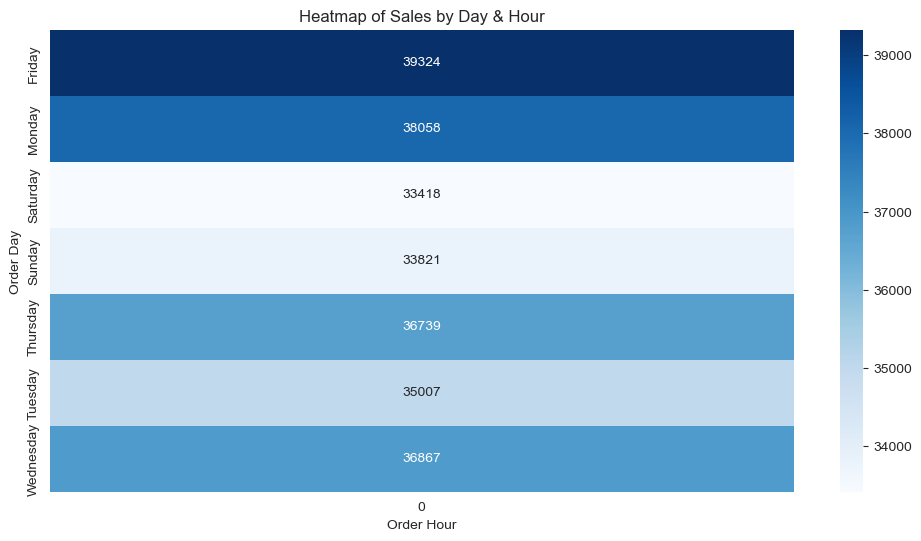

In [31]:
### 7. Heatmap of Sales by Day & Hour
df["Order Hour"] = df["Order Date"].dt.hour
df["Order Day"] = df["Order Date"].dt.day_name()
heatmap_data = df.pivot_table(index="Order Day", columns="Order Hour", values="Sales", aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f")
plt.title("Heatmap of Sales by Day & Hour")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


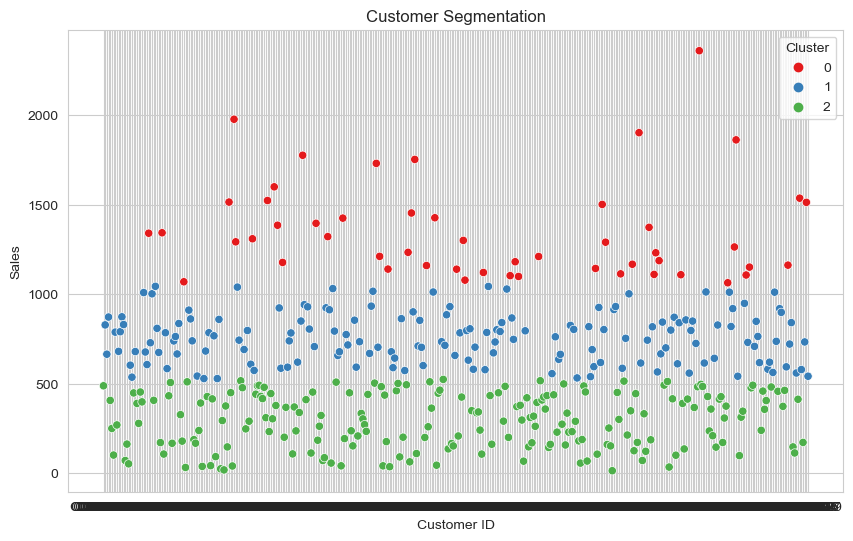

In [33]:
### 8. Customer Segmentation (Cluster Plot)
from sklearn.cluster import KMeans
customer_sales = df.groupby("Customer ID")["Sales"].sum().reset_index()
kmeans = KMeans(n_clusters=3, random_state=42)
customer_sales["Cluster"] = kmeans.fit_predict(customer_sales[["Sales"]])
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_sales, x="Customer ID", y="Sales", hue="Cluster", palette="Set1")
plt.title("Customer Segmentation")
plt.show()

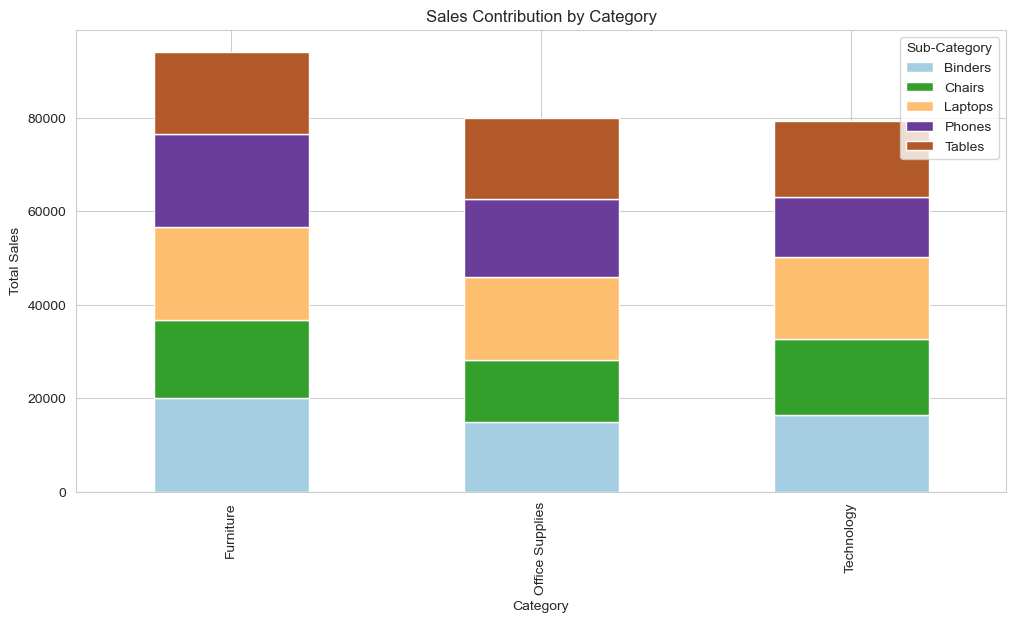

In [35]:
### 9. Sales Contribution by Category (Stacked Bar Chart)
category_sales = df.groupby(["Category", "Sub-Category"])["Sales"].sum().unstack()
category_sales.plot(kind="bar", stacked=True, figsize=(12,6), colormap="Paired")
plt.title("Sales Contribution by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

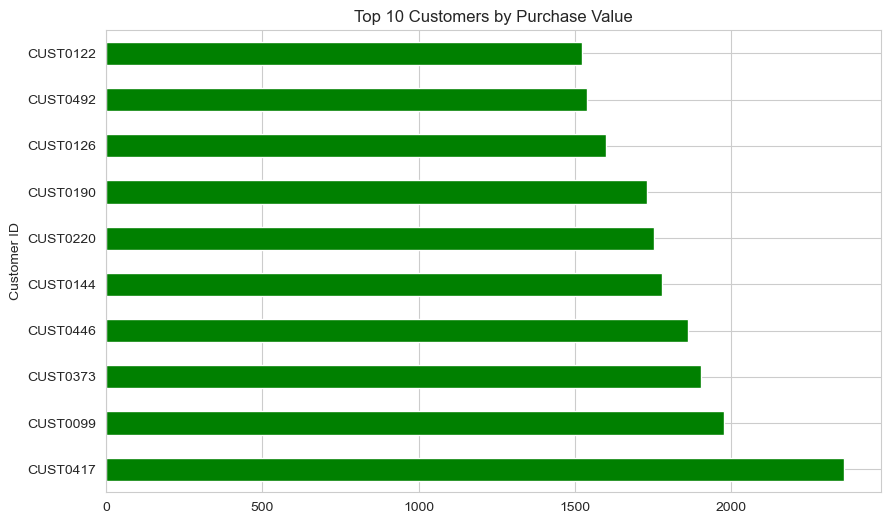

In [37]:
### 10. Top 10 Customers by Purchase Value
top_customers = df.groupby("Customer ID")["Sales"].sum().nlargest(10)
plt.figure(figsize=(10,6))
top_customers.plot(kind="barh", color="green")
plt.title("Top 10 Customers by Purchase Value")
plt.show()

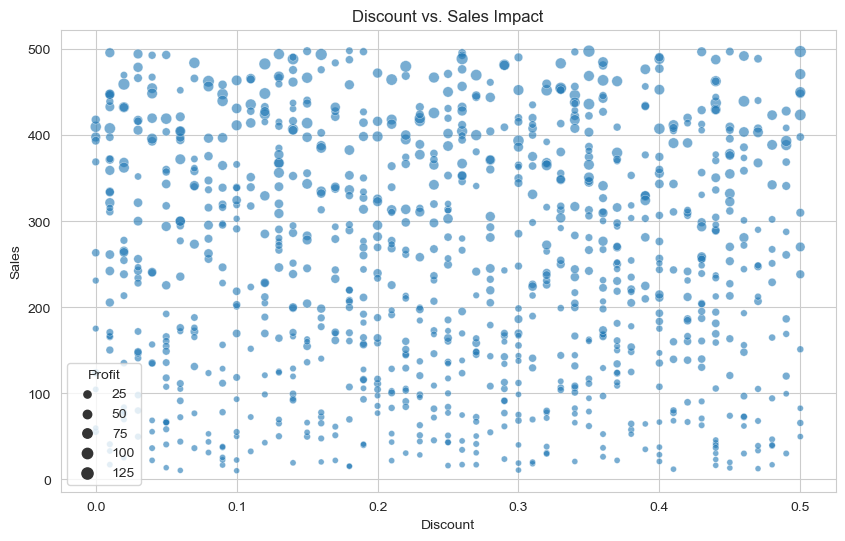

In [39]:
### 11. Discount vs. Sales Impact (Bubble Chart)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["Discount"], y=df["Sales"], size=df["Profit"], alpha=0.6)
plt.title("Discount vs. Sales Impact")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.show()

In [43]:
!pip install squarify

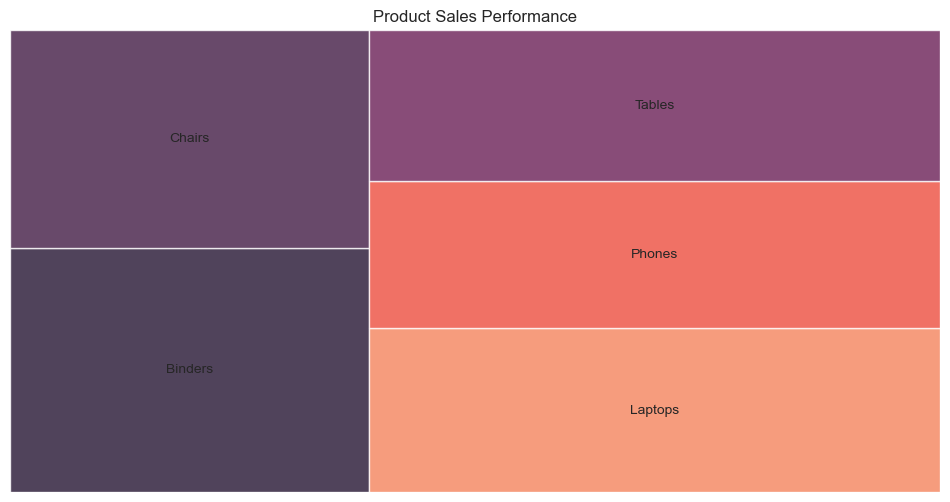

In [45]:
### 12. Product Sales Performance (Treemap)
import squarify
plt.figure(figsize=(12,6))
sizes = df.groupby("Sub-Category")["Sales"].sum()
squarify.plot(sizes=sizes, label=sizes.index, alpha=0.8)
plt.title("Product Sales Performance")
plt.axis("off")
plt.show()


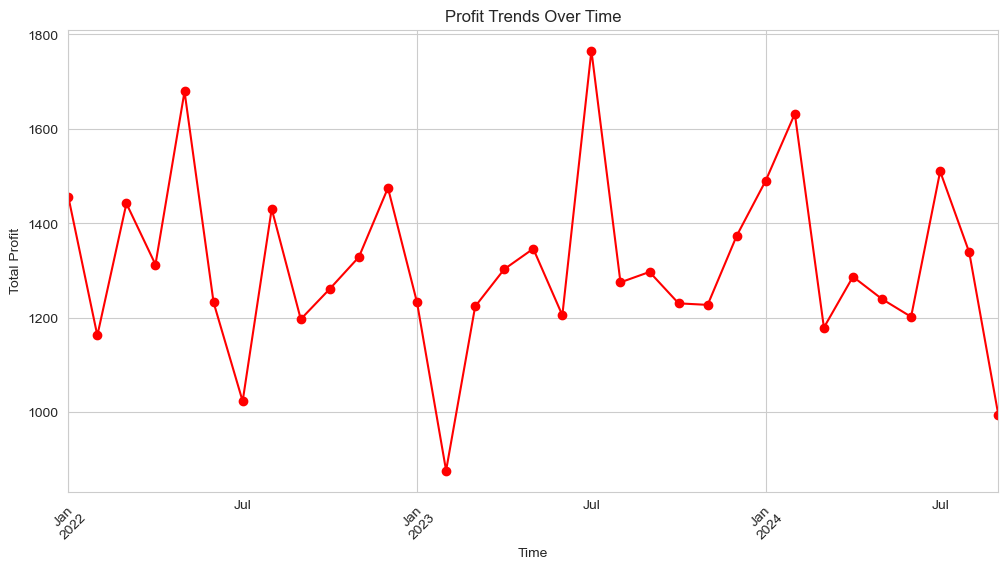

In [47]:
### 13. Profit Trends Over Time (Line Chart with Moving Average)
df["Profit_MA"] = df["Profit"].rolling(6).mean()
plt.figure(figsize=(12,6))
df.groupby("Year-Month")["Profit"].sum().plot(kind="line", marker="o", color="r")
plt.title("Profit Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

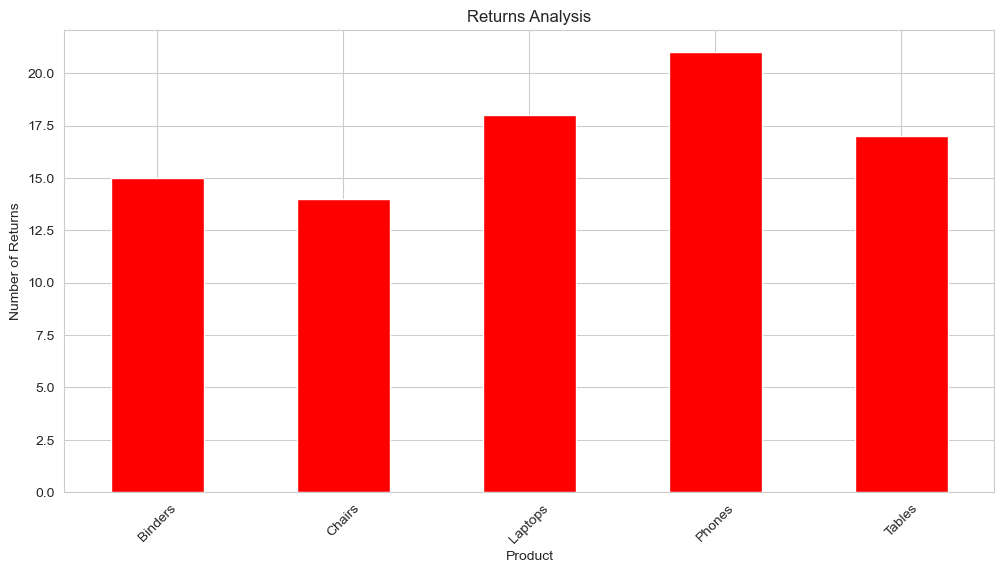

In [49]:
### 14. Returns Analysis
if "Returned" in df.columns:
    returns = df.groupby("Sub-Category")["Returned"].sum()
    returns.plot(kind="bar", figsize=(12,6), color="red")
    plt.title("Returns Analysis")
    plt.xlabel("Product")
    plt.ylabel("Number of Returns")
    plt.xticks(rotation=45)
    plt.show()

<Figure size 1200x600 with 0 Axes>

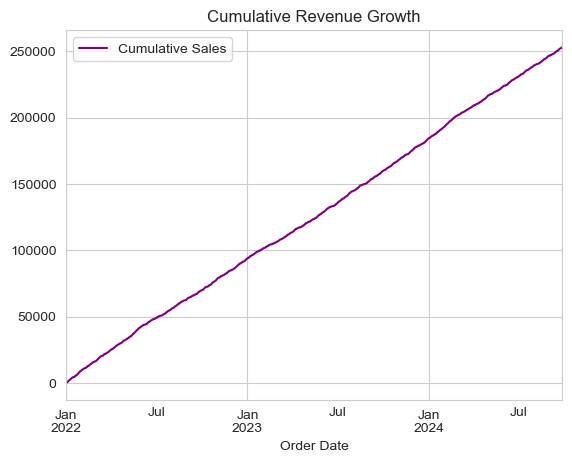

In [53]:
### 16. Cumulative Revenue Growth
df["Cumulative Sales"] = df["Sales"].cumsum()
plt.figure(figsize=(12,6))
df.plot(x="Order Date", y="Cumulative Sales", kind="line", color="purple")
plt.title("Cumulative Revenue Growth")
plt.show()

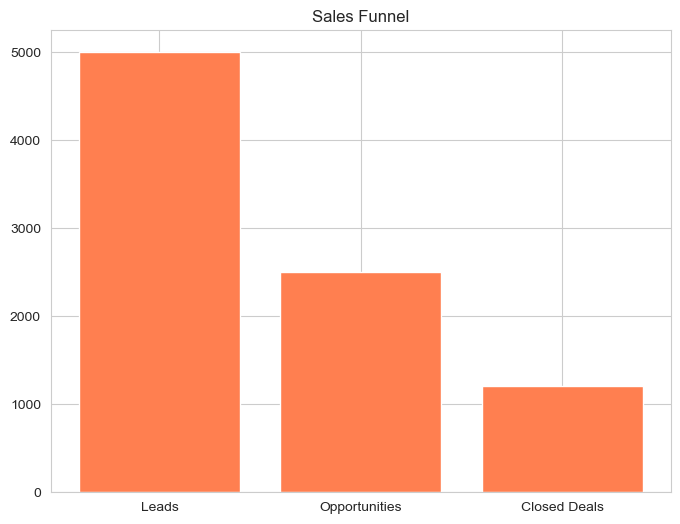

In [55]:
### 17. Sales Funnel
funnel = pd.DataFrame({"Stage": ["Leads", "Opportunities", "Closed Deals"], "Count": [5000, 2500, 1200]})
plt.figure(figsize=(8,6))
plt.bar(funnel["Stage"], funnel["Count"], color="coral")
plt.title("Sales Funnel")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


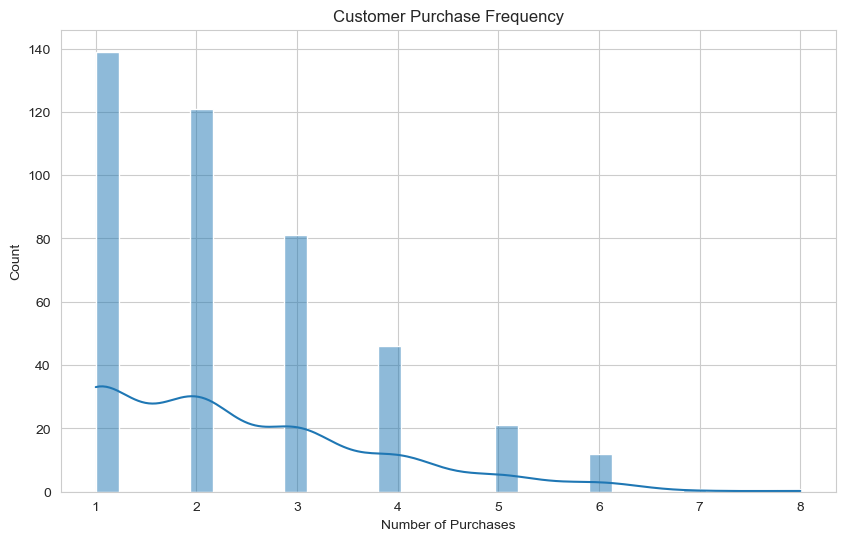

In [57]:
### 18. Customer Purchase Frequency
plt.figure(figsize=(10,6))
sns.histplot(df["Customer ID"].value_counts(), bins=30, kde=True)
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.show()

19:31:05 - cmdstanpy - INFO - Chain [1] start processing
19:31:09 - cmdstanpy - INFO - Chain [1] done processing


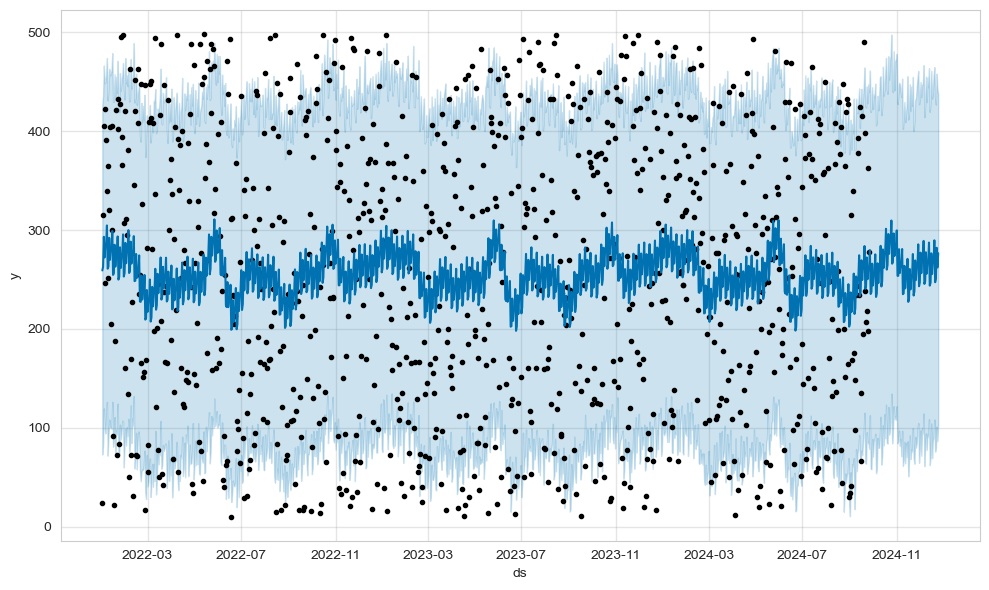

In [59]:
### 19. Sales Forecasting (Prophet)
prophet_data = df.groupby("Order Date")["Sales"].sum().reset_index().rename(columns={"Order Date": "ds", "Sales": "y"})
model = Prophet()
model.fit(prophet_data)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
model.plot(forecast)
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


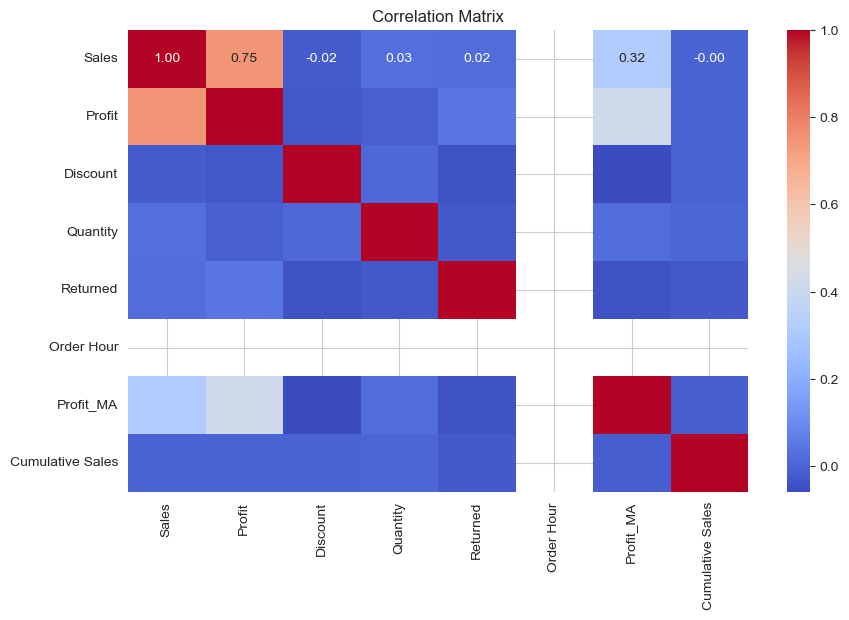

In [63]:
plt.figure(figsize=(10,6))

# Select only numeric columns to avoid errors
numeric_df = df.select_dtypes(include=['number'])

# Generate heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix")
plt.show()
